In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42

In [25]:
### REPLACE with path to AnnData downloaded from GCP ###
data_dir = '/Users/adaly/Documents/mouse_colon/csplotch_anndata'
adata_lambdas = sc.read_h5ad(os.path.join(data_dir, 'adata_csplotch_lambdas.h5ad'))

In [15]:
mroi_short2long = {
    'APEX': 'crypt apex',
    'MID': 'crypt mid',
    'BASE': 'crypt base',
    'SUB-CRYPT': 'sub-crypt',
    'PP': "peyer's patch",
    'CM': 'cross-mucosa',
    'EMM': 'epithelium and mucosae',
    'EMMSUB': 'epithelium and mucosae and submucosa',
    'ALL': 'epithelium and muscle and submucosa',
    'ME': 'externa',
    'MEI': 'externa and interna',
    'MI': 'interna',
    'MMI': 'interna and mucosae',
    'MSUB': 'muscle and submucosa'
}
mroi_long2short = dict([(v,k) for k,v in mroi_short2long.items()])

mroi_colors = {
    'MEI': (228,219,159,255),
    'ME': (183,172,150,255),
    'MI': (204,165,164,255),
    'MMI': (214,188,210,255),
    'MSUB': (206,176,204,255),
    'APEX': (241,149,187,255),
    'BASE': (188,165,197,255),
    'MID': (163,163,198,255),
    'PP': (154,161,196,255),
    'SUB-CRYPT': (165,215,235,255),
    'CM': (179,221,214,255),
    'ALL': (179,221,214,255),
    'EMMSUB': (171,217,185,255),
    'EMM': (162,193,160,255)
}
for k,v in mroi_colors.items():
    mroi_colors[k] = np.array(v)/255

In [27]:
# add entry for array name
arr_names = [Path(x).stem.split('.')[0].split('_stdata')[0] for x in adata_lambdas.obs.index]
adata_lambdas.obs['array_name'] = arr_names

# Rename MROIs to short-form
new_cat = [mroi_long2short[k] for k in adata_lambdas.obs.annotation.cat.categories]
adata_lambdas.rename_categories('annotation', new_cat)

/Users/adaly/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


### Fig 1x: tSNE plots showing annotation of ST data

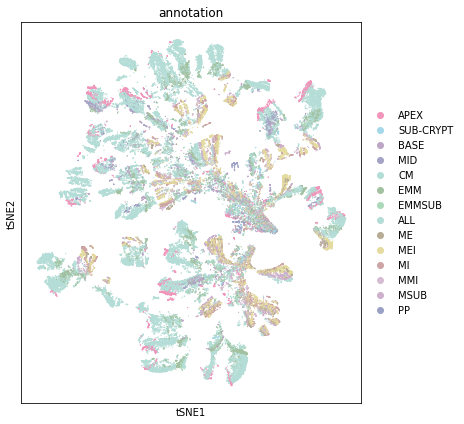

In [118]:
fig, ax = plt.subplots(1, figsize=(7,7))
sc.pl.tsne(adata_lambdas, color='annotation', palette=mroi_colors, size=6.0, ax=ax, show=False)
plt.subplots_adjust(right=0.8)
plt.savefig('fig1_tsne/fig1_st_tsne_mroi.pdf')

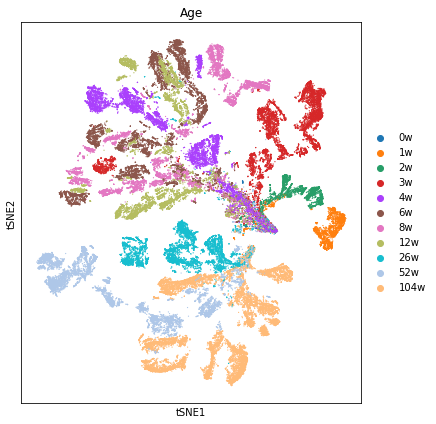

In [119]:
fig, ax = plt.subplots(1, figsize=(7,7))
sc.pl.tsne(adata_lambdas, color='Age', size=6.0, ax=ax, show=False)
plt.subplots_adjust(right=0.8)
plt.savefig('fig1_tsne/fig1_st_tsne_age.pdf')

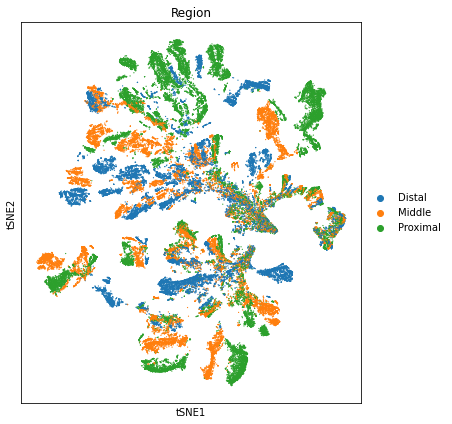

In [120]:
fig, ax = plt.subplots(1, figsize=(7,7))
sc.pl.tsne(adata_lambdas, color='Region', size=6.0, ax=ax, show=False)
plt.subplots_adjust(right=0.8)
plt.savefig('fig1_tsne/fig1_st_tsne_region.pdf')

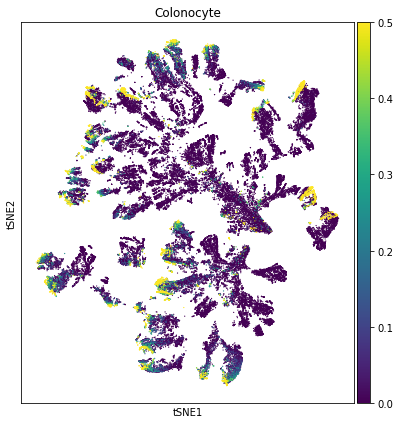

In [23]:
fig, ax = plt.subplots(1, figsize=(7,7))
sc.pl.tsne(adata_lambdas, color='Colonocyte', size=6.0, ax=ax, vmax=0.5, show=False)
plt.subplots_adjust(right=0.85)
plt.savefig('fig1_tsne/fig1_st_tsne_colonocyte.pdf')

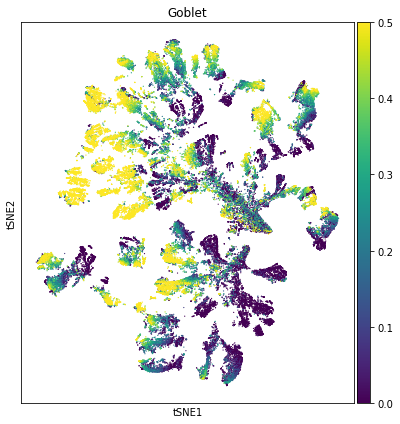

In [22]:
fig, ax = plt.subplots(1, figsize=(7,7))
sc.pl.tsne(adata_lambdas, color='Goblet', ax=ax, size=6.0, show=False, vmax=0.5)
plt.subplots_adjust(right=0.85)
plt.savefig('fig1_tsne/fig1_st_tsne_goblet.pdf')

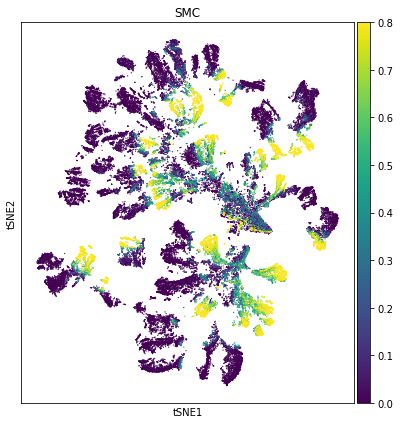

In [6]:
fig, ax = plt.subplots(1, figsize=(7,7))
sc.pl.tsne(adata_lambdas, color='SMC', ax=ax, size=6.0, vmax=0.8, show=False)
plt.subplots_adjust(right=0.85)
plt.savefig('fig1_tsne/fig1_st_tsne_smc.pdf')

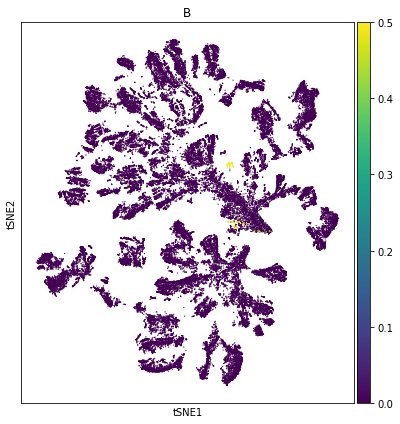

In [21]:
fig, ax = plt.subplots(1, figsize=(7,7))
sc.pl.tsne(adata_lambdas, color='B', ax=ax, size=6.0, vmax=0.5, show=False)
plt.subplots_adjust(right=0.85)
plt.savefig('fig1_tsne/fig1_st_tsne_bcell.pdf')

### Fig 1y: plot MROI markers & spot QOIs over representative arrays

(<Figure size 432x504 with 1 Axes>,
 <AxesSubplot:title={'center':'10015CN99_D1'}>)

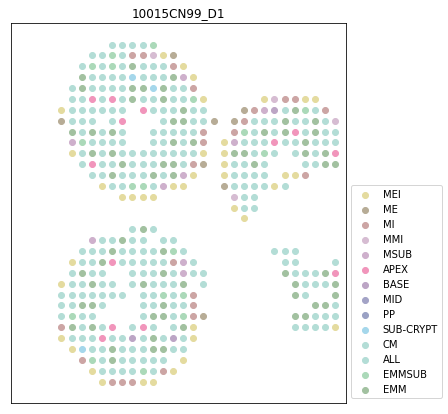

In [28]:
def plot_array_mrois(array_name):
    adata_arr = adata_lambdas[adata_lambdas.obs.array_name == array_name]
    
    fig, ax = plt.subplots(figsize=(6,7))
    
    for mroi, col in mroi_colors.items():
        x = adata_arr.obs.x[adata_arr.obs.annotation == mroi]
        y = adata_arr.obs.y[adata_arr.obs.annotation == mroi]
        
        ax.scatter(x, y, color=col, label=mroi)
    
    ax.set_title(array_name)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().invert_yaxis()
    plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.0))
    
    ax.set_xlim(0,33)
    ax.set_ylim(0,35)
    
    return fig, ax
    
plot_array_mrois('10015CN99_D1')

(<Figure size 504x504 with 2 Axes>,
 <AxesSubplot:title={'center':'10015CN99_D1'}>)

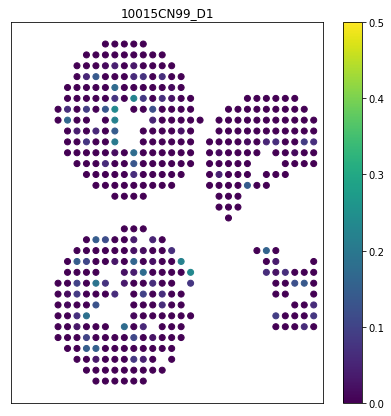

In [29]:
def plot_array_celldensity(array_name, celltype, vmax=0.5):
    adata_arr = adata_lambdas[adata_lambdas.obs.array_name == array_name]
    
    fig, ax = plt.subplots(figsize=(7,7))
    
    x = adata_arr.obs.x
    y = adata_arr.obs.y
    cval = adata_arr.obs[celltype]
    
    pts = ax.scatter(x, y, c=cval, vmin=0, vmax=vmax)
    plt.colorbar(pts)
    ax.set_title(array_name)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().invert_yaxis()
    
    ax.set_xlim(0,33)
    ax.set_ylim(0,35)
    
    return fig, ax
    
plot_array_celldensity('10015CN99_D1', 'Goblet')

(<Figure size 504x504 with 2 Axes>,
 <AxesSubplot:title={'center':'10015CN99_D1'}>)

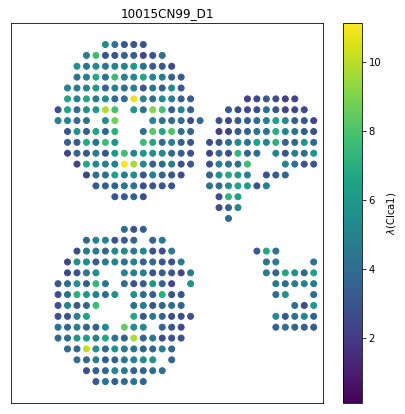

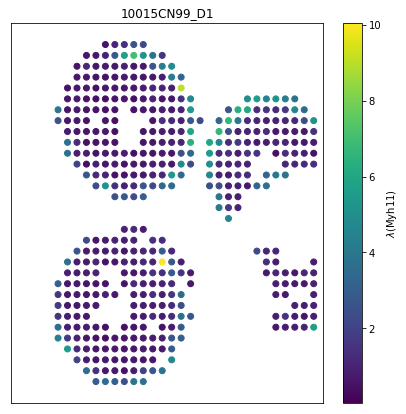

In [30]:
def plot_array_lambda(array_name, gene):
    adata_arr = adata_lambdas[adata_lambdas.obs.array_name == array_name]
    
    fig, ax = plt.subplots(figsize=(7,7))
    
    x = adata_arr.obs.x
    y = adata_arr.obs.y
    cval = np.array(adata_arr[:,gene].X).squeeze()
    
    pts = ax.scatter(x, y, c=cval, vmin=0.05*cval.min(), vmax=0.95*cval.max())
    plt.colorbar(pts, label=r'$\lambda$(%s)' % gene)
    ax.set_title(array_name)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().invert_yaxis()
    
    ax.set_xlim(0,33)
    ax.set_ylim(0,35)
    
    return fig, ax

plot_array_lambda('10015CN99_D1', 'Clca1', vmax=10)
plot_array_lambda('10015CN99_D1', 'Myh11', vmax=10)

In [32]:
dest_dir = 'fig1_st_example_arrays'

if not os.path.exists(dest_dir):
    os.mkdir(dest_dir)
    
arr_list = ['10015CN82_C2', '10015CN118_C1', '10014CN106_C1',
            '10005CN85_C2', 'L9CN36_C2', 'L8CN182_C2',
            'L9CN148_C2', 'L8CN173_C2', '10015CN111_C1',
            '10014CN107_C1', '10015CN99_D1']

for arr in arr_list:
    fig, ax = plot_array_mrois(arr)
    plt.savefig(os.path.join(dest_dir, arr+'_mrois.svg'))
    plt.close()
    
    for gene in ['Clca1', 'Myh11']:
        fig, ax = plot_array_lambda(arr, gene)
        plt.savefig(os.path.join(dest_dir, arr+'_%s.svg' % gene))
        plt.close()
    
    for ct in ['Colonocyte', 'Goblet', 'SMC', 'B']:
        if ct=="SMC":
            if arr=="L9CN36_C2":
                vmax=0.6
            else:
                vmax=0.8
        elif ct=="Goblet" and (arr=="10015CN118_C1" or arr=="10015CN111_C1" or arr=="10015CN99_D1"):
            vmax=0.25
        else:
            vmax=0.5
        
        fig, ax = plot_array_celldensity(arr, ct, vmax=vmax)
        plt.savefig(os.path.join(dest_dir, arr+'_%s.svg' % ct))
        plt.close()